In [1]:
import networkx as nx 
import random
import matplotlib.pyplot as plt
import numpy as np 
import math 
import copy 
import graphviz
from scipy.optimize import fsolve
from typing import List
import sympy as sp
from sympy import Symbol
from collections import deque
import pickle
import lattpy as lp
import import_ipynb
from arrival_networkx import *
from iteration import *

importing Jupyter notebook from arrival_networkx.ipynb
importing Jupyter notebook from iteration.ipynb


In [2]:
def inner_algorithm(L, s, f):
    # L is the current sub-instance, represented by lower (a) and upper (b) bounds.
    # s is the principle slice (∗, ∗, s3).
    # f is the function being analyzed.
    print("Inner algorithm called with L =", L, "and s =", s, ".")

    a, b = L
    a_ = a.copy()
    b_ = b.copy()
    
    fixed_index = None
    for i in range(len(s)):
        if not np.isnan(s[i]):
            fixed_index = i
            a[i] = s[i]
            b[i] = s[i]
            break
    free_idx_1 = (fixed_index + 1) % 3
    free_idx_2 = (fixed_index + 2) % 3
    
      
    # while (a[free_idx_1] + 2 <= b[free_idx_1]) and (a[free_idx_2] + 2 <= b[free_idx_2]):
        
    # print(L)
    mid = (a + b) // 2
    
    bot = np.full(len(mid), np.nan)
    bot[fixed_index] = a[fixed_index]
    bot[free_idx_1] = np.floor((a[free_idx_1] + b[free_idx_1])/2)
    bot[free_idx_2] = a[free_idx_2]
    
    
    top = np.full(len(mid), np.nan)
    top[fixed_index] = b[fixed_index]
    top[free_idx_1] = np.floor((a[free_idx_1] + b[free_idx_1])/2)
    top[free_idx_2] = b[free_idx_2]

    left = np.full(len(mid), np.nan)
    left[fixed_index] = a[fixed_index]
    left[free_idx_1] = a[free_idx_1]
    left[free_idx_2] = np.floor((a[free_idx_2] + b[free_idx_2])/2)
    
    right = np.full(len(mid), np.nan)
    right[fixed_index] = b[fixed_index]
    right[free_idx_1] = b[free_idx_1]
    right[free_idx_2] = np.floor((a[free_idx_2] + b[free_idx_2])/2)
    
    
    f_mid = f(mid)
    if mid[free_idx_1] <= f_mid[free_idx_1] and mid[free_idx_2] <= f_mid[free_idx_2]:
        # mid belongs to Up(f_s)
        return mid, b_
        
    elif mid[free_idx_1] >= f_mid[free_idx_1] and mid[free_idx_2] >= f_mid[free_idx_2]:
        # mid belongs to Down(f_s)
        return a_, mid
        
    elif mid[free_idx_1] <= f_mid[free_idx_1] and mid[free_idx_2] > f_mid[free_idx_2]:
        if mid[fixed_index] <= f_mid[fixed_index]:
            # step 2, case 3a
            f_right = f(right)
            if right[fixed_index] > f_right[fixed_index]:
                return None ## order preserving violation
            elif right[free_idx_1] < f_right[free_idx_1]:
                ## case 3a ii lemma 12
                p =right 
                pass
            else:
                return a_, right 
        else:
            # step 2, case 3b
            f_bot = f(bot)
            if bot[fixed_index] > f_bot[fixed_index]:
                print("order preserving violation, bot: ", bot,"f_bot:", f_bot)
                return None ## order preserving violation
            elif bot[free_idx_2] > f_bot[free_idx_2]:
                ### case 3b ii lemma 12
                p = bot
                pass
            else:
                return bot, b_
            
    elif mid[free_idx_1] > f_mid[free_idx_1] and mid[free_idx_2] <= f_mid[free_idx_2]:
        if mid[fixed_index] <= f_mid[fixed_index]:
            # step 2, case 3a
            f_top = f(top)
            if top[fixed_index] > f_top[fixed_index]:
                return None ## order preserving violation
            elif top[free_idx_2] < f_top[free_idx_2]:
                ## case 3a ii lemma 12
                p = top
                print("incomplete case")
                pass
            else:
                return a_, top
        else:
            # step 2, case 3b
            f_left = f(left)
            if left[fixed_index] > f_left[fixed_index]:
                print("ov2")
                return None ## order preserving violation
            elif left[free_idx_1] > f_left[free_idx_1]:
                ### case 3b ii lemma 12
                p = left
                print("incomplete case")
                pass
            else:
                return left, b_


    # Terminal phase: Check if the instance size is reduced sufficiently.
    if np.all(b - a <= 1):
        print("Terminal phase reached.")

    # Return the final sub-instance containing a solution, or indicate a violation was found.
    return a, b

In [3]:
# def inner_algorithm(L, s, f):
#     # L is the current sub-instance, represented by lower (a) and upper (b) bounds.
#     # s is the principle slice (∗, ∗, s3).
#     # f is the function being analyzed.
#     print("Inner algorithm called with L =", L, "and s =", s, ".")

#     a, b = L
#     fixed_index = None
#     for i in range(len(s)):
#         if s[i] != np.NaN:
#             fixed_index = i
#             a[i] = s[i]
#             b[i] = s[i]
#             break
        
#     inner_count = 0
#     while True:
#         inner_count += 1
#         print("innerloop", inner_count)
#         # print(L)
#         mid = (a + b) // 2
#         free_idx_1 = (fixed_index + 1) % 3
#         free_idx_2 = (fixed_index + 2) % 3
        
#         bot = (np.floor((a[free_idx_1] + b[free_idx_1])/2), a[free_idx_2])
#         top = (np.floor((a[free_idx_1] + b[free_idx_1])/2), b[free_idx_2])
        
#         left = (a[free_idx_1], np.floor((a[free_idx_2] + b[free_idx_2])/2))
#         right = (b[free_idx_1], np.floor((a[free_idx_2] + b[free_idx_2])/2))
        
        
        

#         # Step 1: Check for up/down set witnesses and handle boundary conditions.
#         if is_up_set_witness(a, mid, f):
#             # Move to the next iteration with the sub-instance [mid, b].
#             a = mid
#             break 
#         elif is_down_set_witness(mid, b, f):
#             # Move to the next iteration with the sub-instance [a, mid].
#             b = mid
#             break
#         else:
#             # Additional checks for special cases and order preservation violations.
#             if check_order_preservation(a, mid, f) or check_order_preservation(mid, b, f):
#                 print("Order preservation violation found.")
#                 return None  # Terminate the algorithm.

#         # Terminal phase: Check if the instance size is reduced sufficiently.
#         if np.all(b - a <= 1):
#             print("Terminal phase reached.")
#             break

#     # Return the final sub-instance containing a solution, or indicate a violation was found.
#     return a, b

In [28]:
def outer_algorithm(f, x, y):
    """
    The outer algorithm for navigating a Tarski instance in a k-dimensional lattice.
    
    Args:
    - f: The function for which Tarski fixed points are being sought.
    - n: A list or numpy array representing the maximum bounds in each dimension of the lattice.
    
    Returns:
    - Final search space that either contains a solution or a subset where a solution exists.
    """
    # Initialize the search space
    k = len(x)  # Dimensionality of the problem
    # x = np.ones(k)  # The least element in the lattice
    # y = np.array(n)  # The greatest element in the lattice
    print("Initial search space: x =", x, "y =", y)
    

    # Iteratively refine the search space
    while np.any(y - x >= 2):
        # Determine the dimension i with the largest gap between x and y
        i = np.argmax(y - x)
        
        # Create a principle slice s centered between x and y in the selected dimension
        s = np.full(k, np.nan, dtype=float)
        s[i] = x[i] + (y[i] - x[i]) // 2

        # Invoke the inner algorithm on the current sub-instance and principle slice
        La_b = (x.copy(), y.copy())
        result = inner_algorithm(La_b, s, f)
        
        
        # Check the result of the inner algorithm
        if result is None:
            print("An order preservation violation was found.")
            return None
        
        
        # Update x and y to the refined sub-instance bounds
        x, y = result
        
        print("Refined bounds: x =", x, "y =", y)

    return x, y



In [12]:
# game = Arrival(3)
# x = np.array([0, 0, 0])
# y = np.array([2**3, 2**3, 2**3])
# game.X,game.equations = game.get_equations()
# result = outer_algorithm(game.evaluate, x, y)

Initial search space: x = [0 0 0] y = [8 8 8]
Inner algorithm called with L = (array([0, 0, 0]), array([8, 8, 8])) and s = [ 4. nan nan] .
Refined bounds: x = [4 4 4] y = [8 8 8]
Inner algorithm called with L = (array([4, 4, 4], dtype=int32), array([8, 8, 8])) and s = [ 6. nan nan] .
Refined bounds: x = [6 6 6] y = [8 8 8]
Inner algorithm called with L = (array([6, 6, 6], dtype=int32), array([8, 8, 8])) and s = [ 7. nan nan] .
Refined bounds: x = [7 7 7] y = [8 8 8]


In [19]:
# srt, end = result
# for i in range(int(srt[0]),int(end[0])+1):
#     for j in range(int(srt[1]),int(end[1])+1):
#         for k in range(int(srt[2]),int(end[2])+1):
#             print(np.array([i,j,k]), game.evaluate(np.array([i,j,k])))
#             if np.all(game.evaluate(np.array([i,j,k])) == np.array([i,j,k])):
#                     print(np.array([i,j,k]))
#                     break

[7 7 7] [4 8 7]
[7 7 8] [5 8 7]
[7 8 7] [4 8 8]
[7 8 8] [5 8 8]
[8 7 7] [4 8 7]
[8 7 8] [5 8 7]
[8 8 7] [4 8 8]
[8 8 8] [5 8 8]


In [23]:
class AlgorithmL():
    def __init__(self, f,Lattice):
        self.lower, self.upper = Lattice
        self.f = f
        self.P = set()    
        
    def evaluation_function_A(self, x):
        l,u = self.construct_l_u(x)
        algob = AlgorithmB(x, self.f, (l,u))
        y = algob.solve()
        self.P.add(np.concatenate([x,y]))
        
        return self.f(np.concatenate([x,y]))[:len(x)]
        
    def construct_l_u(self, x):
        D = [p[len(x):] for p in self.P if np.all(p[:len(x)] <= x)]
        l = self.lower[len(x):] if not D else np.max(np.array(D), axis=0)
        
        U = [p[len(x):] for p in self.P if np.all(p[:len(x)] >= x)]
        u = self.upper[len(x):] if not U else np.min(np.array(U), axis=0)
        
        return l,u
        

    def solve(self):
        ### TODO
        algoA = AlgorithmA(self.evaluation_function_A, (self.lower[:3],self.upper[:3]))
        return algoA.solve_tarski_3d()


class AlgorithmA():
    def __init__(self,  sub_function, Lattice_A):
        self.lower, self.upper = Lattice_A
        self.sub_function = sub_function 
        
        
    def solve_tarski_3d(self):
        final_sub_instance = outer_algorithm(self.sub_function, self.lower, self.upper)
        print("Outcome:", final_sub_instance)
        srt , end = final_sub_instance
        
        ## loop through all the points between srt and end inclusive
        for i in range(int(srt[0]),int(end[0])+1):
            for j in range(int(srt[1]),int(end[1])+1):
                for k in range(int(srt[2]),int(end[2])+1):
                    if np.all(self.sub_function(np.array([i,j,k])) == np.array([i,j,k])):
                        return np.array([i,j,k])
        
        return None


class AlgorithmB():
    def __init__(self, x, f , Lattice_B):
        self.lower, self.upper = Lattice_B
        self.x = x
        self.f = f
        
    def solve(self):
        if len(self.lower) > 3:
            algoL = AlgorithmL(self.sub_function,(self.lower,self.upper))
            return algoL.solve()
        elif len(self.lower) == 3:
            algoA = AlgorithmA(self.sub_function, (self.lower,self.upper))
            return algoA.solve_tarski_3d()
    
    def sub_function(self,y):
        return self.f(np.concatenate([self.x,y]))[- len(y):]

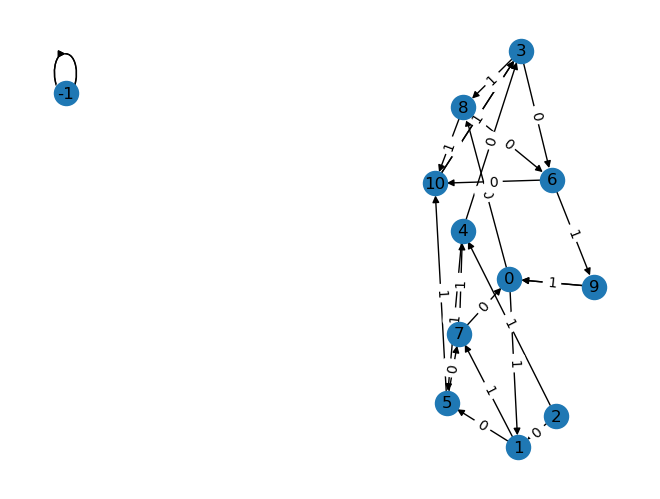

True

In [24]:
# number_of_nodes = 12
# game = Arrival(number_of_nodes-1,do_reachability=True)
# game.draw_graph()
# game.run_procedure()

In [29]:
# lower = np.zeros(12)
# upper = np.array([2**11]*12)
# algoL = AlgorithmL(game.evaluate, (lower,upper))

# print(algoL.solve())

Initial search space: x = [0. 0. 0.] y = [2048 2048 2048]
Inner algorithm called with L = (array([0., 0., 0.]), array([2048, 2048, 2048])) and s = [1024.   nan   nan] .
Initial search space: x = [0. 0. 0.] y = [2048 2048 2048]
Inner algorithm called with L = (array([0., 0., 0.]), array([2048, 2048, 2048])) and s = [1024.   nan   nan] .
Initial search space: x = [0. 0. 0.] y = [2048 2048 2048]
Inner algorithm called with L = (array([0., 0., 0.]), array([2048, 2048, 2048])) and s = [1024.   nan   nan] .
Initial search space: x = [0. 0. 0.] y = [2048 2048 2048]
Inner algorithm called with L = (array([0., 0., 0.]), array([2048, 2048, 2048])) and s = [1024.   nan   nan] .
Refined bounds: x = [0. 0. 0.] y = [1024. 1024. 2048.]
Inner algorithm called with L = (array([0., 0., 0.]), array([1024., 1024., 2048.])) and s = [  nan   nan 1024.] .
Refined bounds: x = [ 512.  512. 1024.] y = [1024. 1024. 2048.]
Inner algorithm called with L = (array([ 512.,  512., 1024.]), array([1024., 1024., 2048.])

TypeError: cannot unpack non-iterable NoneType object